In [1]:
pip install statsmodels pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Import Exponential Smoothing sebagai model untuk prediksi
import pandas as pd #Pandas untuk menyimpan data
import matplotlib.pyplot as plt #matplotlib untuk visualisasi data

In [11]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
data = pd.read_csv('D:/asea.txt')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

# Pastikan frekuensi indeks cocok dengan data
if data.index.freq is None:
    # Validasi apakah panjang indeks cocok dengan data
    if len(data) != len(pd.date_range(start=data.index[0], end=data.index[-1], freq='B')):
        print("Panjang data tidak cocok dengan rentang waktu yang dihasilkan. Menggunakan frekuensi asli.")
    else:
        data.index = pd.date_range(start=data.index[0], end=data.index[-1], freq='B')

# Ambil kolom 'Close'
close = data['Close']

# Splitting data historis menjadi training dan testing
test_size = 21  # Jumlah hari untuk pengujian
train = close[:-test_size]  # Data sebelum periode pengujian
test = close[-test_size:]  # Data aktual untuk periode pengujian

# Re-train model pada data training
model = ExponentialSmoothing(train, trend='add').fit()

# Forecast pada data testing
forecast = model.forecast(steps=len(test))

# Hitung matriks error
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))


# Tampilkan hasil
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")



Panjang data tidak cocok dengan rentang waktu yang dihasilkan. Menggunakan frekuensi asli.
Mean Absolute Error (MAE): 0.10587898050095348
Root Mean Squared Error (RMSE): 0.15044347817013373


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


menggunakan model Holt’s Linear Trend untuk mengamati tren linear dari package statsmodels,
menggunakan pandas untuk mengelompokan data,
menggunakan matplotlib untuk memvisualkan data

# prediksi harga penutupan pada asea.us.txt

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


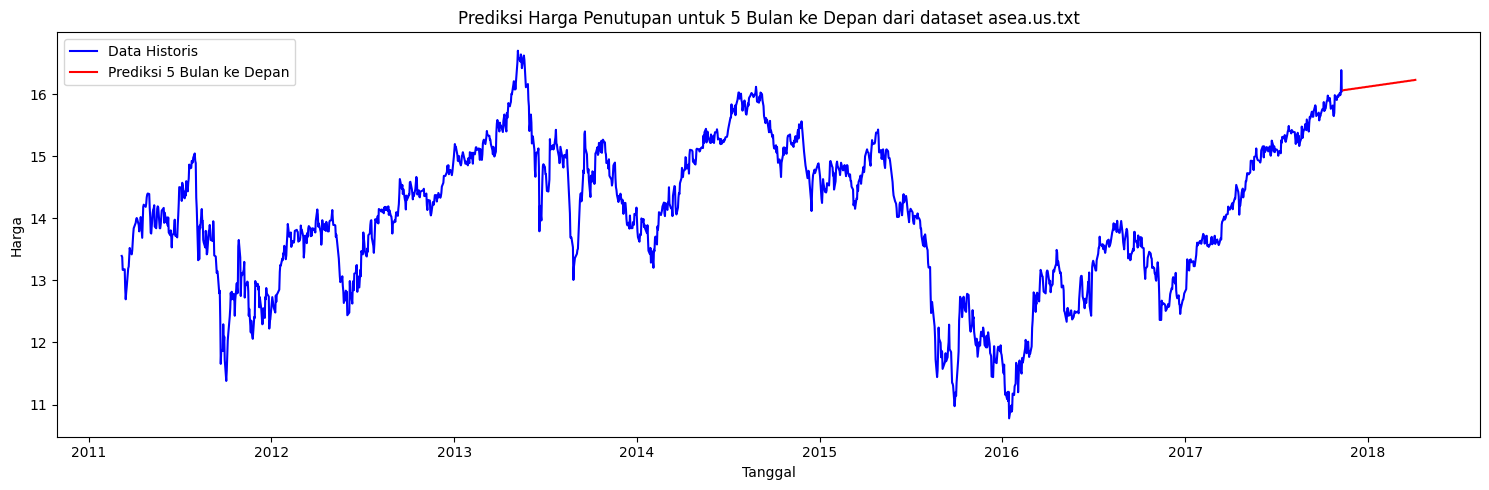

In [ ]:
data = pd.read_csv('D:/asea.txt') #read dataset dari filepath
data['Date'] = pd.to_datetime(data['Date']) #Mengubah data dari kolom date menjadi format datetime
data = data.sort_values('Date') # mengurutkan data berdasarkan Date
data.set_index('Date', inplace=True) # mengubah date menjadi indeks untuk memudahkan pengolahan data time series
close = data['Close'] #mengambil data dari kolom close

model = ExponentialSmoothing(close, trend='add').fit() #model yang digunakan adalah exponential smoothing

hariKerja = 5 * 21 #jumlah hari kerja yaitu 5 hari kerja tiap minggu, dan asumsi ada 21 minggu
prediksi = model.forecast(steps=hariKerja) #untuk memprediksi berdasarkan hari kerjanya

#Membuat Data Frame
tanggalPrediksi = pd.date_range(start=close.index[-1], periods=hariKerja + 1, freq='B')[1:] #Membuat rentang tanggal kerja (business days) mulai dari tanggal terakhir data.
dataFramePrediksi = pd.DataFrame({'Date': tanggalPrediksi, 'prediksiClose': prediksi.values}) #Membuat DataFrame baru berisi tanggal prediksi dan nilai prediksi harga penutupan
dataFramePrediksi.set_index('Date', inplace=True) #Membuat dataframe jadi indeks

plt.figure(figsize=(15, 5))
plt.plot(close, label='Data Historis', color='blue')
plt.plot(dataFramePrediksi['prediksiClose'], label='Prediksi 5 Bulan ke Depan', color='red')
plt.title('Prediksi Harga Penutupan untuk 5 Bulan ke Depan dari dataset asea.us.txt')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.tight_layout()
plt.show()


***Hasil Analisis:***

dari hasil visualisasi data diatas, kita dapat melihat bahwa prediksi harga penutupan untuk 5 bulan kedepan akan mengalami kenaikan jika di lihat dari data data sebelumnya.

# prediksi harga pembukaan pada aok.us.txt

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


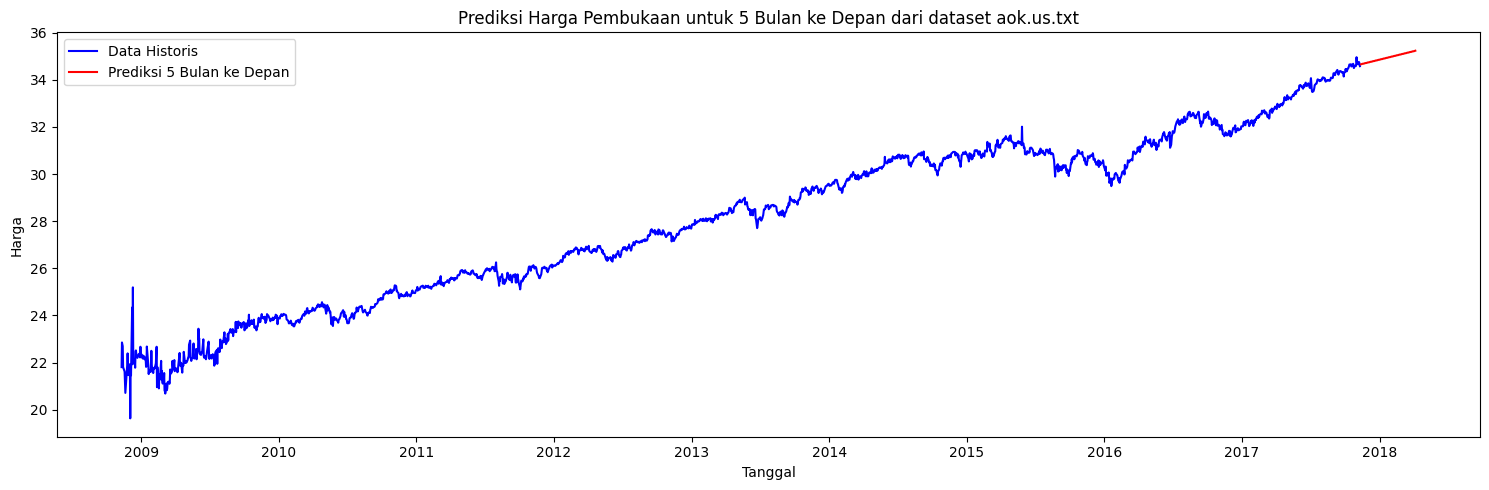

In [3]:
data = pd.read_csv('D:/aok.us.txt')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)
open = data['Open']

model = ExponentialSmoothing(open, trend='add').fit()

hariKerja = 5 * 21
prediksi = model.forecast(steps=hariKerja)

tanggalPrediksi = pd.date_range(start=open.index[-1], periods=hariKerja + 1, freq='B')[1:]
dataFramePrediksi = pd.DataFrame({'Date': tanggalPrediksi, 'prediksiOpen': prediksi.values})
dataFramePrediksi.set_index('Date', inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(open, label='Data Historis', color='blue')
plt.plot(dataFramePrediksi['prediksiOpen'], label='Prediksi 5 Bulan ke Depan', color='red')
plt.title('Prediksi Harga Pembukaan untuk 5 Bulan ke Depan dari dataset aok.us.txt')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.tight_layout()
plt.show()


***Hasil Analisis:***

dari hasil visualisasi data diatas, kita dapat melihat bahwa prediksi harga pembukaan untuk 5 bulan kedepan juga akan mengalami kenaikan jika di lihat dari data data sebelumnya.

# prediksi harga tertinggi pada aom.us.txt

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


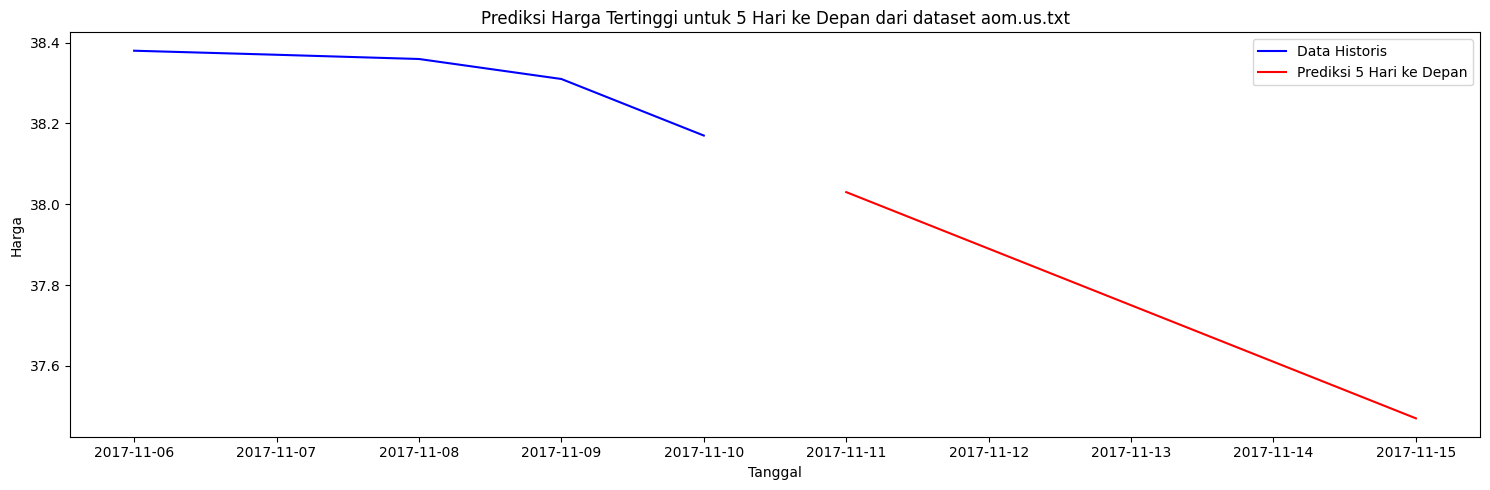

In [7]:
data = pd.read_csv('D:/aom.us.txt') #read dataset dari filepath
data['Date'] = pd.to_datetime(data['Date']) #mengubah kolom Date menjadi tipe datetime
data = data.sort_values('Date') #Mengurutkan data sesuai kolom Date
data.set_index('Date', inplace=True) #
high = data['High']
highLimaHariTerakhir = high[-5:]

model = ExponentialSmoothing(highLimaHariTerakhir, trend='add').fit()

hariKerja = 5
prediksi = model.forecast(steps=hariKerja)

tanggalPrediksi = pd.date_range(start=highLimaHariTerakhir.index[-1], periods=hariKerja + 1)[1:]
dataFramePrediksi = pd.DataFrame({'Date': tanggalPrediksi, 'prediksiHigh': prediksi.values})
dataFramePrediksi.set_index('Date', inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(highLimaHariTerakhir, label='Data Historis', color='blue')
plt.plot(dataFramePrediksi['prediksiHigh'], label='Prediksi 5 Hari ke Depan', color='red')
plt.title('Prediksi Harga Tertinggi untuk 5 Hari ke Depan dari dataset aom.us.txt')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.tight_layout()
plt.show()


***Hasil Analisis:***

dari hasil visualisasi data diatas, kita dapat melihat bahwa prediksi harga tertinggi untuk 5 hari kedepan akan mengalami penurunan jika di lihat dari data 5 hari sebelumnya. pada tanggal 10 ke 11 tidak ditampilkan karena bukan hari kerja

# prediksi harga terrendah pada argt.us.txt

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


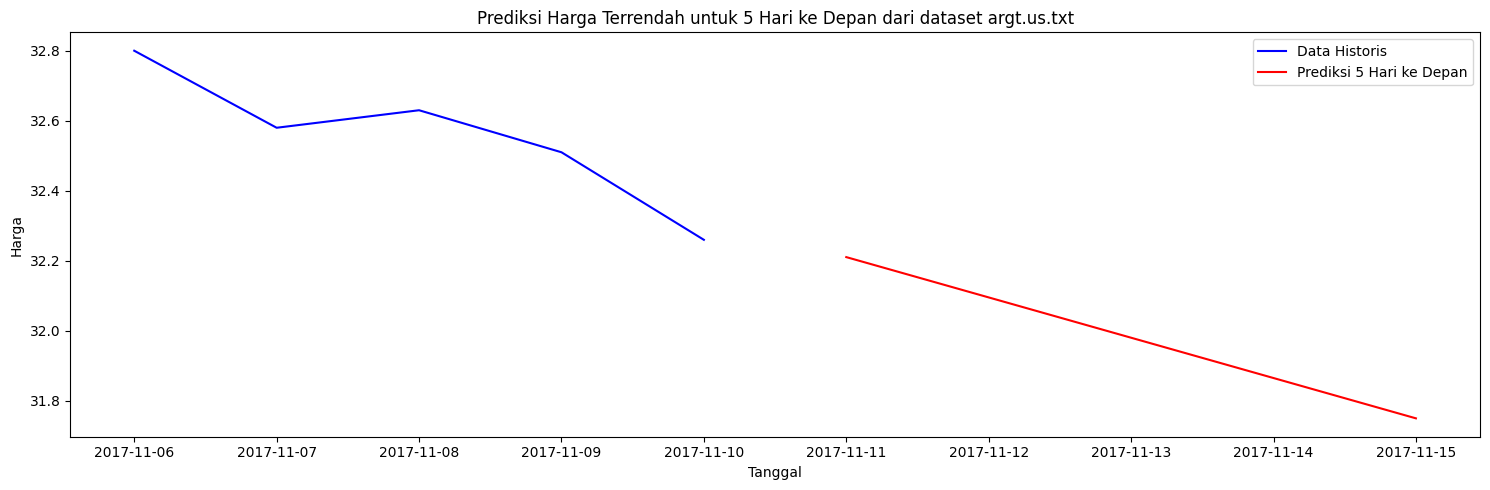

In [5]:
data = pd.read_csv('D:/argt.us.txt')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)
low = data['Low']
lowLimaHariTerakhir = low[-5:]

model = ExponentialSmoothing(lowLimaHariTerakhir, trend='add').fit()

hariKerja = 5
prediksi = model.forecast(steps=hariKerja)

tanggalPrediksi = pd.date_range(start=lowLimaHariTerakhir.index[-1], periods=hariKerja + 1)[1:]
dataFramePrediksi = pd.DataFrame({'Date': tanggalPrediksi, 'prediksiLow': prediksi.values})
dataFramePrediksi.set_index('Date', inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(lowLimaHariTerakhir, label='Data Historis', color='blue')
plt.plot(dataFramePrediksi['prediksiLow'], label='Prediksi 5 Hari ke Depan', color='red')
plt.title('Prediksi Harga Terrendah untuk 5 Hari ke Depan dari dataset argt.us.txt')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.tight_layout()
plt.show()


***Hasil Analisis:***

dari hasil visualisasi data diatas, kita dapat melihat bahwa prediksi harga terendah untuk 5 hari kedepan akan mengalami kenaikan jika di lihat dari data 5 hari sebelumnya. pada tanggal 9 tidak ditampilkan karena bukan hari kerja

# prediksi volume pada aor.us.txt

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result 

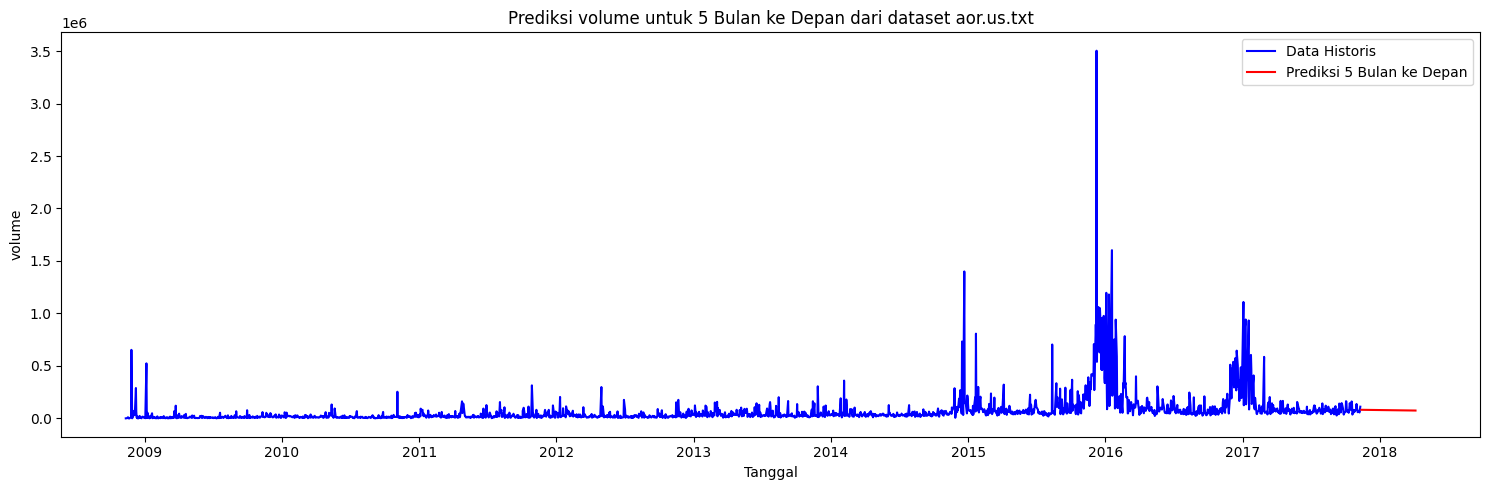

In [5]:
data = pd.read_csv('D:/aor.us.txt')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)
volume = data['Volume']

model = ExponentialSmoothing(volume, trend='add').fit()

hariKerja = 5 * 21
prediksi = model.forecast(steps=hariKerja)

tanggalPrediksi = pd.date_range(start=volume.index[-1], periods=hariKerja + 1, freq='B')[1:]
dataFramePrediksi = pd.DataFrame({'Date': tanggalPrediksi, 'prediksiVolume': prediksi.values})
dataFramePrediksi.set_index('Date', inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(volume, label='Data Historis', color='blue')
plt.plot(dataFramePrediksi['prediksiVolume'], label='Prediksi 5 Bulan ke Depan', color='red')
plt.title('Prediksi volume untuk 5 Bulan ke Depan dari dataset aor.us.txt')
plt.xlabel('Tanggal')
plt.ylabel('volume')
plt.legend()
plt.tight_layout()
plt.show()


***Hasil Analisis:***

dari hasil visualisasi data diatas, kita dapat melihat bahwa prediksi volume untuk 5 bulan kedepan hampir constant atau tidak terlalu signifikan terjadi penurunan jika di lihat dari data 5 bulan sebelumnya.